In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="chesterish")
pd.options.display.max_rows = 100

## Data structuring

#### Importing data.csv

In [2]:
root_dir = os.path.dirname(os.getcwd())
data_clean = pd.read_csv("{}/data/data_E2_a.csv".format(root_dir))
data_clean.head()

,subject_id,rt,stimulus,trial_type,time_elapsed,gender,age,language,country,sampling,turkcode,nb_of_run,responses,stim_type,length,state_OR_event,branch_first,time_interval,node_selected
0,1,NaN,instruction,image-button-response,33515,female,30,English,United States of America,Left,R564336057500gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,instruction,causal-graph2,39587,female,30,English,United States of America,Left,R564336057500gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,instruction,causal-graph2,53665,female,30,English,United States of America,Left,R564336057500gxrw,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,instruction,causal-graph2,56916,female,30,English,United States of America,Left,R564336057500gxrw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,NaN,instruction,causal-graph2,88944,female,30,English,United States of America,Left,R564336057500gxrw,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
time = []
for item in data_clean[data_clean['stimulus']=='comment']['time_elapsed']:
    time.append(item)
time = np.array(time)
time.mean()/1000/60

22.278197023809522

#### Demographical data only

In [4]:
data_demog = data_clean[["subject_id","gender","age","language","country","turkcode"]]
data_demog.head()

,subject_id,gender,age,language,country,turkcode
0,1,female,30,English,United States of America,R564336057500gxrw
1,1,female,30,English,United States of America,R564336057500gxrw
2,1,female,30,English,United States of America,R564336057500gxrw
3,1,female,30,English,United States of America,R564336057500gxrw
4,1,female,30,English,United States of America,R564336057500gxrw


#### Target stimuli only (instructions deleted)

In [5]:
data = data_clean[["subject_id","rt","stimulus","trial_type","sampling","nb_of_run","stim_type","length","state_OR_event",
                   "branch_first","time_interval","node_selected"]]
data = data[data["stimulus"] != "instruction"].drop(['trial_type'],axis=1)
data.reset_index(drop=True,inplace=True)

data.head()

,subject_id,rt,stimulus,sampling,nb_of_run,stim_type,length,state_OR_event,branch_first,time_interval,node_selected
0,1,14003.515,branch_LTSE3,Left,4.0,AND_Gate,Short,Event,Top,Long,"[{""selected"":""node6"",""rank"":1}]"
1,1,10760.605,branch_LTMS,Left,1.0,AND_Gate,Medium,State,Top,NaN,"[{""selected"":""node4"",""rank"":2}]"
2,1,10380.485,chain_LS,Left,1.0,Chain,Short,NaN,NaN,NaN,"[{""selected"":""node6"",""rank"":3}]"
3,1,12376.005,branch_LBSE1,Left,1.0,AND_Gate,Short,Event,Bottom,Short,"[{""selected"":""node6"",""rank"":1},{""selected"":""no..."
4,1,18872.180,branch_LBME3,Left,1.0,AND_Gate,Medium,Event,Bottom,Long,"[{""selected"":""node4"",""rank"":2},{""selected"":""no..."


#### Chain only

In [6]:
data_chain = data[data["stim_type"]=="Chain"].drop(["stim_type","state_OR_event","branch_first","time_interval"],axis=1)
data_chain.reset_index(drop=True,inplace=True)
data_chain["stimulus"] = data_chain["stimulus"].astype("category")
data_chain["sampling"] = data_chain["sampling"].astype("category")
data_chain["length"] = data_chain["length"].astype("category")
data_chain['node_selected'] = data_chain.apply(lambda x:json.loads(x['node_selected']),axis=1)
data_chain.rename(columns={'node_selected':'nodes_ranked'},inplace=True)
data_chain.head()

,subject_id,rt,stimulus,sampling,nb_of_run,length,nodes_ranked
0,1,10380.485,chain_LS,Left,1.0,Short,"[{'selected': 'node6', 'rank': 3}]"
1,1,12000.310,chain_LM,Left,1.0,Medium,"[{'selected': 'node3', 'rank': 2}, {'selected'..."
2,1,57229.860,chain_LL,Left,1.0,Long,"[{'selected': 'node2', 'rank': 1}]"
3,2,10560.000,chain_RS,Right,1.0,Short,"[{'selected': 'node7', 'rank': 1}]"
4,2,13751.000,chain_RM,Right,1.0,Medium,"[{'selected': 'node5', 'rank': 2}, {'selected'..."


#### AND-Gate only

In [7]:
data_AND_Gate = data[data["stim_type"]=="AND_Gate"].drop(["stim_type"],axis=1)
data_AND_Gate.reset_index(drop=True,inplace=True)
data_AND_Gate["stimulus"] = data_AND_Gate["stimulus"].astype("category")
data_AND_Gate["state_OR_event"] = data_AND_Gate["state_OR_event"].astype("category")
data_AND_Gate["sampling"] = data_AND_Gate["sampling"].astype("category")
data_AND_Gate["length"] = data_AND_Gate["length"].astype("category")
data_AND_Gate["branch_first"] = data_AND_Gate["branch_first"].astype("category")
data_AND_Gate["time_interval"] = data_AND_Gate["time_interval"].astype("category")
data_AND_Gate["nb_of_run"] = data_AND_Gate["nb_of_run"].astype("category")

data_AND_Gate['node_selected'] = data_AND_Gate.apply(lambda x:json.loads(x['node_selected']),axis=1)
data_AND_Gate.rename(columns={'node_selected':'nodes_ranked'},inplace=True)
data_AND_Gate.head()

,subject_id,rt,stimulus,sampling,nb_of_run,length,state_OR_event,branch_first,time_interval,nodes_ranked
0,1,14003.515,branch_LTSE3,Left,4.0,Short,Event,Top,Long,"[{'selected': 'node6', 'rank': 1}]"
1,1,10760.605,branch_LTMS,Left,1.0,Medium,State,Top,NaN,"[{'selected': 'node4', 'rank': 2}]"
2,1,12376.005,branch_LBSE1,Left,1.0,Short,Event,Bottom,Short,"[{'selected': 'node6', 'rank': 1}, {'selected'..."
3,1,18872.180,branch_LBME3,Left,1.0,Medium,Event,Bottom,Long,"[{'selected': 'node4', 'rank': 2}, {'selected'..."
4,1,15256.415,branch_LTME2,Left,1.0,Medium,Event,Top,Medium,"[{'selected': 'node4', 'rank': 3}, {'selected'..."


## Functions

In [8]:
def chain_node_cat(length,node):
    node =  int(node[-1])
    short = {'INACT':[1,2,3,4,5,6],'ROOIMDT':[7],'EFFECT':[8]}
    medium = {'INACT':[1,2,3,4],'ROOT':[5],'INBTW':[6],'IMDT':[7],'EFFECT':[8]}
    long = {'INACT':[1,2],'ROOT':[3],'INBTW':[4,5,6],'IMDT':[7],'EFFECT':[8]}
    category = [cat for cat,nd in (short if length == 'Short' else medium if length == 'Medium' 
                                   else long).items() if node in nd][0]
    
    return category

def branch_node_cat(length,node,first):
    node = int(node[-1]) if len(node) == 5 else int(node[-2:])
    short_top = {'INACT_1st':[1,2,3,4,5,6],'INACT_2nd':[8,9,10,11,12,13],'ROOIMDT_1st':[7],'ROOIMDT_2nd':[14],'EFFECT':[15]}
    short_bot = {'INACT_1st':[8,9,10,11,12,13],'INACT_2nd':[1,2,3,4,5,6],'ROOIMDT_1st':[14],'ROOIMDT_2nd':[7],'EFFECT':[15]}
    medium_top = {'INACT_1st':[1,2,3,4],'INACT_2nd':[8,9,10,11],'ROOT_1st':[5],'ROOT_2nd':[12],'INBTW_1st':[6],'INBTW_2nd':[13],
                  'IMDT_1st':[7],'IMDT_2nd':[14],'EFFECT':[15]}
    medium_bot = {'INACT_1st':[8,9,10,11],'INACT_2nd':[1,2,3,4],'ROOT_1st':[12],'ROOT_2nd':[5],'INBTW_1st':[13],'INBTW_2nd':[6],
                  'IMDT_1st':[14],'IMDT_2nd':[7],'EFFECT':[15]}
    long_top = {'INACT_1st':[1,2],'INACT_2nd':[8,9],'ROOT_1st':[3],'ROOT_2nd':[10],'INBTW_1st':[4,5,6],'INBTW_2nd':[11,12,13],
                  'IMDT_1st':[7],'IMDT_2nd':[14],'EFFECT':[15]}
    long_bot = {'INACT_1st':[8,9],'INACT_2nd':[1,2],'ROOT_1st':[10],'ROOT_2nd':[3],'INBTW_1st':[11,12,13],'INBTW_2nd':[4,5,6],
                  'IMDT_1st':[14],'IMDT_2nd':[7],'EFFECT':[15]}
    if length == 'Short':
        category = [cat for cat,nd in (short_top if first == 'Top' else short_bot).items() if node in nd][0]
    elif length == 'Medium':
        category = [cat for cat,nd in (medium_top if first == 'Top' else medium_bot).items() if node in nd][0]
    elif length == 'Long':
        category = [cat for cat,nd in (long_top if first == 'Top' else long_bot).items() if node in nd][0]
    
    return category

class AndGate(object):

    def __init__(self,length=None):
        if length == "short":
            data = data_AND_Gate[data_AND_Gate["length"]=="Short"]
        elif length == "medium":
            data = data_AND_Gate[data_AND_Gate["length"]=="Medium"]
        elif length == "long":
            data = data_AND_Gate[data_AND_Gate["length"]=="Long"]
            
        self.df = data
        self.df.reset_index(drop=True,inplace=True)
        
    def add_filter(self,sampling=None,level=None,delay=None,rank=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
        if level == "top":
            self.df = self.df[self.df["branch_first"]=="Top"]
        elif level == "bottom":
            self.df = self.df[self.df["branch_first"]=="Bottom"]
        if delay == "short":
            self.df = self.df[self.df["time_interval"]=="Short"]
        elif delay == "medium":
            self.df = self.df[self.df["time_interval"]=="Medium"]
        elif delay == "long":
            self.df = self.df[self.df["time_interval"]=="Long"]
        elif delay == False:
            self.df = self.df[self.df["state_OR_event"]=="State"]
        elif delay == True:
            self.df = self.df[self.df["state_OR_event"]=="Event"]
        self.df.reset_index(drop=True,inplace=True)
        
        return self
    
    def add_column_rank(self,rank=None):
        if rank != None:
            if type(rank) == int:
                rank = [rank]
            for r in rank:
                if r not in set(np.arange(1,16)):
                    raise ValueError('The parameter "rank" has to be greater or equal to 1 and less or equal to 15')
                name_nodes = 'nodes_ranked_'+str(r)
                name_cat = 'categories_ranked_'+str(r)
                nodes_selected = []
                categories_selected = []
                for idx, x in enumerate(self.df['nodes_ranked']):
                    nodes = []
                    categories = []
                    for y in x:
                        if y['rank'] == r:
                            nodes.append(y['selected'])
                            category = branch_node_cat(self.df.iloc[idx]['length'],y['selected'],self.df.iloc[idx]['branch_first'])
                            categories.append(category)
                    if len(nodes) == 0:
                        nodes = np.nan
                    if len(categories) == 0:
                        categories = np.nan
                    nodes_selected.append(nodes)
                    categories_selected.append(categories)
                if name_nodes not in self.df.columns:
                    self.df = self.df.assign(name_nodes = pd.Series(nodes_selected))
                    self.df = self.df.assign(name_cat = pd.Series(categories_selected))
                    self.df.rename(columns={'name_nodes':name_nodes,'name_cat':name_cat},inplace=True)
        
        return self
    
    def ranking(self,value=1,output='ranking',normalized=True):
        if normalized not in {True,False}:
            raise ValueError('"normalized" has to be True or False')
        length = self.df.iloc[0]['length']
        if  length == 'Short':
            counts = {'INACT_1st':0,'INACT_2nd':0,'ROOIMDT_1st':0,'ROOIMDT_2nd':0,'EFFECT':0}
            details = {'INACT':{'1st':[0],'2nd':[0],'3d':[0],'4th':[0],'5th':[0],'last':[0]},
                       'INACT_1st':{'1st':[0,'node1','node8'],'2nd':[0,'node2','node9'],'3d':[0,'node3','node10'],
                                    '4th':[0,'node4','node11'],'5th':[0,'node5','node12'],'last':[0,'node6','node13']},
                       'INACT_2nd':{'1st':[0,'node1','node8'],'2nd':[0,'node2','node9'],'3d':[0,'node3','node10'],
                                    '4th':[0,'node4','node11'],'5th':[0,'node5','node12'],'last':[0,'node6','node13']}}

        else:
            counts = {'INACT_1st':0,'INACT_2nd':0,'ROOT_1st':0,'ROOT_2nd':0,'INBTW_1st':0,'INBTW_2nd':0,
                      'IMDT_1st':0,'IMDT_2nd':0,'EFFECT':0}
            if length == 'Medium':
                details = {'INACT':{'1st':[0],'2nd':[0],'3d':[0],'last':[0]},
                               'INACT_1st':{'1st':[0,'node1','node8'],'2nd':[0,'node2','node9'],
                                            '3d':[0,'node3','node10'],'last':[0,'node4','node11']},
                               'INACT_2nd':{'1st':[0,'node1','node8'],'2nd':[0,'node2','node9'],
                                            '3d':[0,'node3','node10'],'last':[0,'node4','node11']}}
                
            elif length == 'Long':
                details = {'INACT':{'1st':[0],'last':[0]},
                               'INACT_1st':{'1st':[0,'node1','node8'],'last':[0,'node2','node9']},
                               'INACT_2nd':{'1st':[0,'node1','node8'],'last':[0,'node2','node9']},
                               'INBTW_1st':{'1st':[0,'node4','node11'],'2nd':[0,'node5','node12'],
                                            'last':[0,'node6','node13']},
                               'INBTW_2nd':{'1st':[0,'node4','node11'],'2nd':[0,'node5','node12'],
                                            'last':[0,'node6','node13']}}
            
        for idx, x in enumerate(self.df['nodes_ranked']):
            same_rank = 0
            for y in x:
                if y['rank'] == value:
                    same_rank += 1
            for y in x:
                if y['rank'] == value:
                    category = branch_node_cat(self.df.iloc[idx]['length'],y['selected'],self.df.iloc[idx]['branch_first'])
                    counts.update({category:counts[category]+1/same_rank})
                    if category in details.keys():
                        for item in details[category].values():
                            if y['selected'] in item:
                                item[0] += 1/same_rank
        total = np.array(list(counts.values())).sum()
        if normalized == True and total != 0:
            counts.update({k:counts[k]/total*100 for k in counts.keys()})
        for item in details:
            details[item].update({k:details[item][k][0] for k in details[item].keys()})
        details['INACT'].update({k:details['INACT_1st'][k]+details['INACT_2nd'][k] for k in details['INACT'].keys()})
        for item in details:
            total = np.array(list(details[item].values())).sum()
            if normalized == True and total != 0:
                details[item].update({k:details[item][k]/total*100 for k in details[item].keys()})
        details.update({item:pd.Series(details[item]) for item in details.keys()})
        counts = pd.Series(counts)
        
        if output=='ranking':
            return counts
        elif output=='broad_cat':
            return list(details.keys())
        else:
            try:
                return details[output]
            except KeyError:
                print("Error! Category '{}' contains only one detector or doesn't exist.\n\nList of availible categories containing more than one detector:{}".format(output,list(details.keys())))
    
class Chain(object):
    def __init__(self,length=None):
        if length == "short":
            data = data_chain[data_chain["length"]=="Short"]
        elif length == "medium":
            data = data_chain[data_chain["length"]=="Medium"]
        elif length == "long":
            data = data_chain[data_chain["length"]=="Long"]
            
        self.df = data
        self.df.reset_index(drop=True,inplace=True)
        
    def add_filter(self,sampling=None,rank=None):
        if sampling == "right":
            self.df = self.df[self.df["sampling"]=="Right"]
        elif sampling == "left":
            self.df = self.df[self.df["sampling"]=="Left"]
        self.df.reset_index(drop=True,inplace=True)
        
        return self
    
    def add_column_rank(self,rank=None):
        if rank != None:
            if type(rank) == int:
                rank = [rank]
            for r in rank:
                if r not in set(np.arange(1,9)):
                    raise ValueError('The parameter "rank" has to be greater or equal to 1 and less or equal to 15')
                name_nodes = 'nodes_ranked_'+str(r)
                name_cat = 'categories_ranked_'+str(r)
                nodes_selected = []
                categories_selected = []
                for idx, x in enumerate(self.df['nodes_ranked']):
                    nodes = []
                    categories = []
                    for y in x:
                        if y['rank'] == r:
                            nodes.append(y['selected'])
                            category = chain_node_cat(self.df.iloc[idx]['length'],y['selected'])
                            categories.append(category)
                    if len(nodes) == 0:
                        nodes = np.nan
                    if len(categories) == 0:
                        categories = np.nan
                    nodes_selected.append(nodes)
                    categories_selected.append(categories)
                if name_nodes not in self.df.columns:
                    self.df = self.df.assign(name_nodes = pd.Series(nodes_selected))
                    self.df = self.df.assign(name_cat = pd.Series(categories_selected))
                    self.df.rename(columns={'name_nodes':name_nodes,'name_cat':name_cat},inplace=True)
        
        return self
    
    def ranking(self,value=1,output='ranking',normalized=True):
        if normalized not in {True,False}:
            raise ValueError('"normalized" has to be True or False')
        length = self.df.iloc[0]['length']
        if  length == 'Short':
            counts = {'INACT':0,'ROOIMDT':0,'EFFECT':0}
            details = {'INACT':{'1st':[0,'node1'],'2nd':[0,'node2'],'3d':[0,'node3'],'4th':[0,'node4'],
                                '5th':[0,'node5'],'last':[0,'node6']}}
        else:
            counts = {'INACT':0,'ROOT':0,'INBTW':0,'IMDT':0,'EFFECT':0}
            if length == 'Medium':
                details = {'INACT':{'1st':[0,'node1'],'2nd':[0,'node2'],'3d':[0,'node3'],'last':[0,'node4']}}
            elif length == 'Long':
                details = {'INACT':{'1st':[0,'node1'],'last':[0,'node2']},'INBTW':{'1st':[0,'node4'],'2nd':[0,'node5'],
                                                                                   'last':[0,'node6']}}

        for idx, x in enumerate(self.df['nodes_ranked']):
            same_rank = 0
            for y in x:
                if y['rank'] == value:
                    same_rank += 1
            for y in x:
                if y['rank'] == value:
                    category = chain_node_cat(self.df.iloc[idx]['length'],y['selected'])
                    counts.update({category:counts[category]+1/same_rank})
                    if category in details.keys():
                        for item in details[category].values():
                            if y['selected'] in item:
                                item[0] += 1/same_rank
        total = np.array(list(counts.values())).sum()
        if normalized == True:
            counts.update({k:counts[k]/total*100 for k in counts.keys()})
        for item in details:
            details[item].update({k:details[item][k][0] for k in details[item].keys()})
            total = np.array(list(details[item].values())).sum()
            if normalized == True:
                details[item].update({k:details[item][k]/total*100 for k in details[item].keys()})
        details.update({item:pd.Series(details[item]) for item in details.keys()})
        counts = pd.Series(counts)

        if output=='ranking':
            return counts
        elif output=='broad_cat':
            return list(details.keys())
        else:
            try:
                return details[output]
            except KeyError:
                print("Error! Category '{}' contains only one detector.\n\nList of availible categories containing more than one detector:{}".format(output,list(details.keys())))
    
def graph(list_of_data,title,rank=1,normalized=True,limit=50):
    if type(list_of_data) == AndGate or type(list_of_data) == Chain:
        list_of_data = [list_of_data]
    if type(rank) == int:
        rank = [rank]
    if type(title) == str:
        title = [title]
    fig = plt.figure(figsize=(6.6*len(list_of_data),5))
    a = str(len(list_of_data))
    for i,x in enumerate(list_of_data):
        axis = fig.add_subplot(int("1"+a+str(i+1)))
        axis.set_ylim([0,limit])
        if normalized == True:
            axis.set_ylabel("Total points of causality (in %)")
        else:
            axis.set_ylabel("Total points of causality")
        axis.label_outer()
        axis.spines["top"].set_visible(False)
        axis.spines["right"].set_visible(False)
        axis.set_title(title[i])
        rank_s = 'rank' if len(rank) == 1 else 'ranks'
        plt.suptitle('Results for {} : {}'.format(rank_s,str(rank).replace('[','').replace(']','')),y=1.05)
        axis.set_xlabel("Location of the cause",labelpad=20)
        df = {}
        for item in rank:
            name = 'rank'+str(item)
            df[name] = x.ranking(value=item,normalized=normalized)
        df = pd.DataFrame(df)
        df.plot.bar(ax=axis,stacked=True)
            
def graph_cat_details(data,category,data_title,rank=1,normalized=True):
    fig = plt.figure(figsize=(9,5))
    ax = fig.add_subplot(111)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if normalized == True:
        plt.ylabel('Total points of causality (in %)')
    elif normalized == False:
        plt.ylabel('Total points of causality')
    plt.xlabel("Node's location")
    plt.title("{}: location of selected nodes for category '{}' and rank {}".format(data_title,category,rank),y=1.1)
    data = data.ranking(value=rank,output=category,normalized=normalized)
    data.plot.bar()

## General comparison

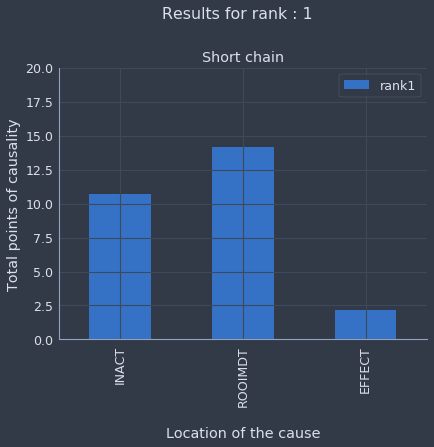

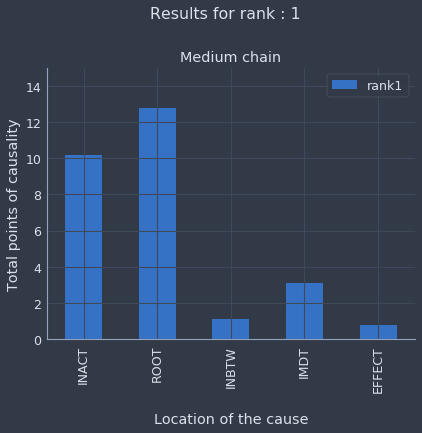

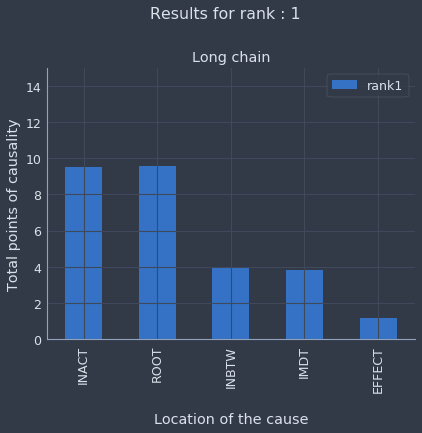

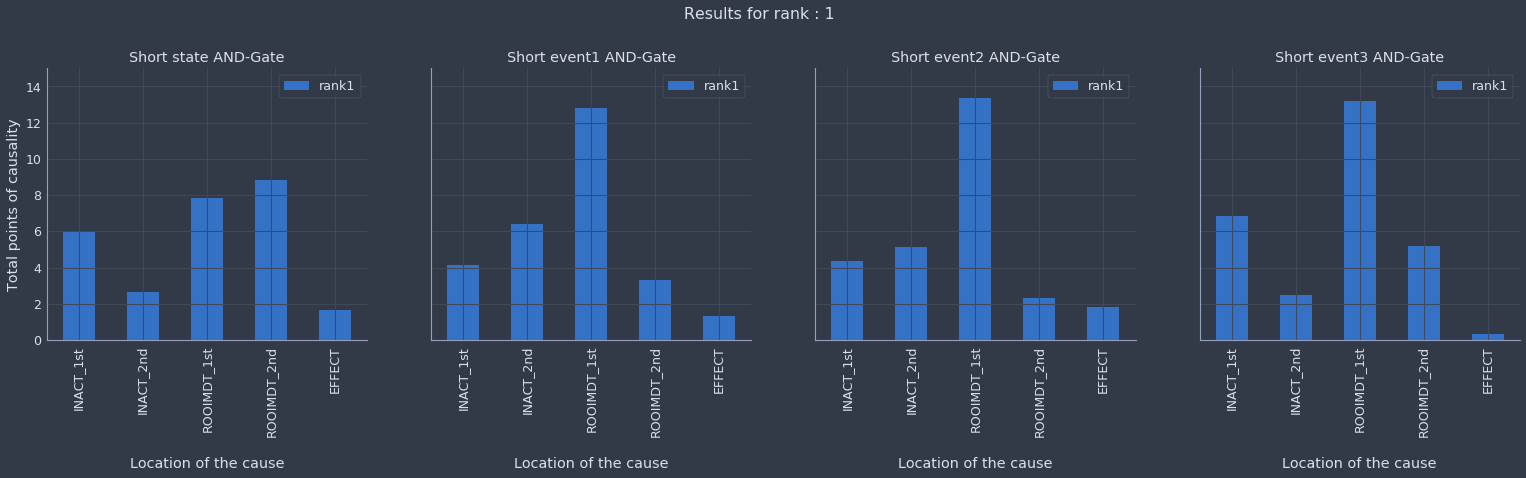

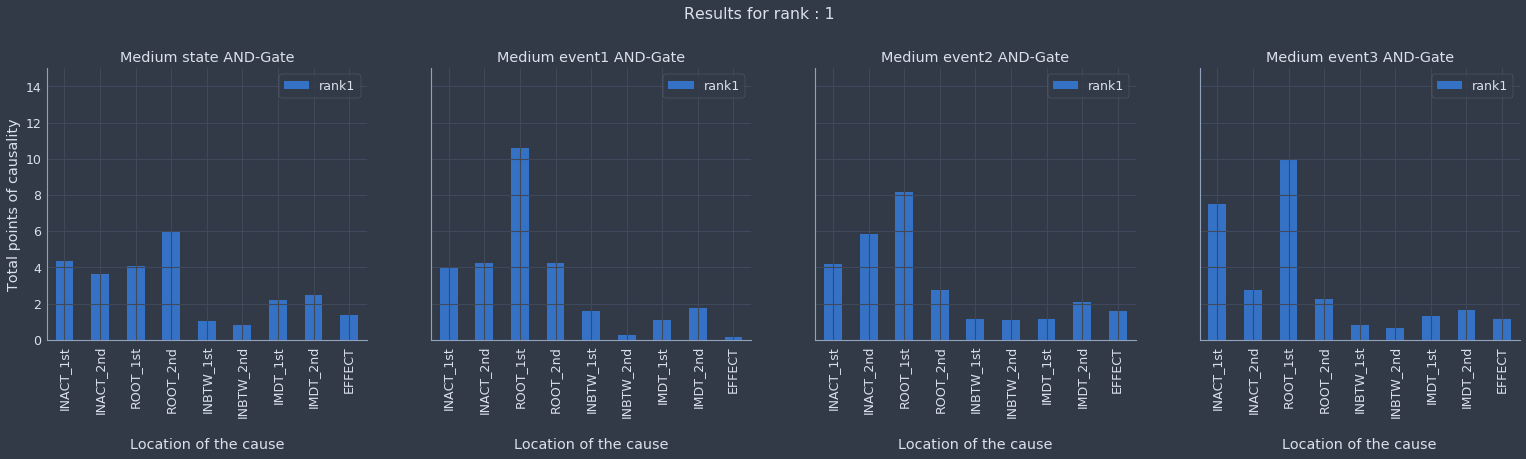

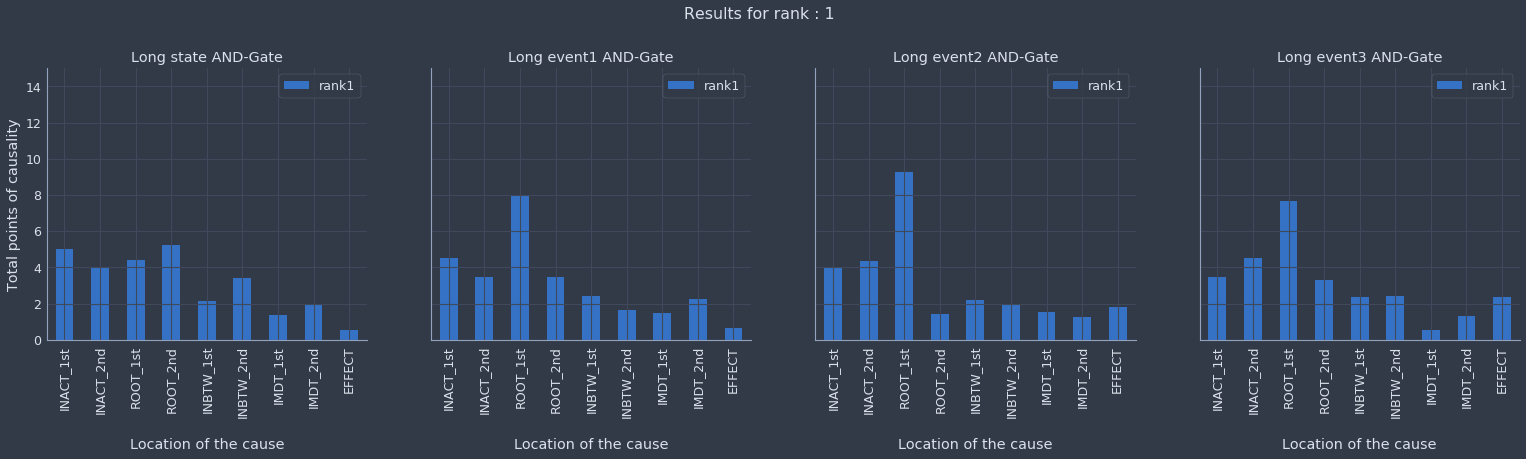

In [15]:
ChainShort = Chain("short")
ChainMedium = Chain("medium")
ChainLong = Chain("long")
ShortState = AndGate("short").add_filter(delay=False)
MediumState = AndGate("medium").add_filter(delay=False)
LongState = AndGate("long").add_filter(delay=False)
ShortEvent = AndGate("short").add_filter(delay=True)
ShortEvent1 = AndGate("short").add_filter(delay="short")
ShortEvent2 = AndGate("short").add_filter(delay="medium")
ShortEvent3 = AndGate("short").add_filter(delay="long")
MediumEvent = AndGate("medium").add_filter(delay=True)
MediumEvent1 = AndGate("medium").add_filter(delay="short")
MediumEvent2  = AndGate("medium").add_filter(delay="medium")
MediumEvent3 = AndGate("medium").add_filter(delay="long")
LongEvent = AndGate('long').add_filter(delay=True)
LongEvent1 = AndGate("long").add_filter(delay="short")
LongEvent2  = AndGate("long").add_filter(delay="medium")
LongEvent3 = AndGate("long").add_filter(delay="long")

title1 = "Short chain"
title2 = "Medium chain"
title3 = "Long chain"
title4 = ["Short state AND-Gate","Short event1 AND-Gate","Short event2 AND-Gate","Short event3 AND-Gate"]
title5 = ["Medium state AND-Gate","Medium event1 AND-Gate","Medium event2 AND-Gate","Medium event3 AND-Gate"]
title6 = ["Long state AND-Gate","Long event1 AND-Gate","Long event2 AND-Gate","Long event3 AND-Gate"]

graph(ChainShort,title1,rank=[1],normalized=False,limit=20)
graph(ChainMedium,title2,rank=[1],normalized=False,limit=15)
graph(ChainLong,title3,rank=[1],normalized=False,limit=15)
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],title4,rank=[1],normalized=False,limit=15)
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],title5,rank=[1],normalized=False,limit=15)
graph([LongState,LongEvent1,LongEvent2,LongEvent3],title6,rank=[1],normalized=False,limit=15)

# The y-axis 'Total points of causality' represents, for one rank, the total points of causality that each 
# category received over all the participants. For one particular rank, a participant is granted a unit of 
# causality that he can split between different detectors. If he ranks two detectors 1, and if the detectors 
# belong to different categories, then for rank 1 both categories are assigned 0.5pts of causality. If they 
# belong to the same category, then the category is assignes 0.5 + 0.5 = 1pt of causality.

## Access the details of one category for one rank.

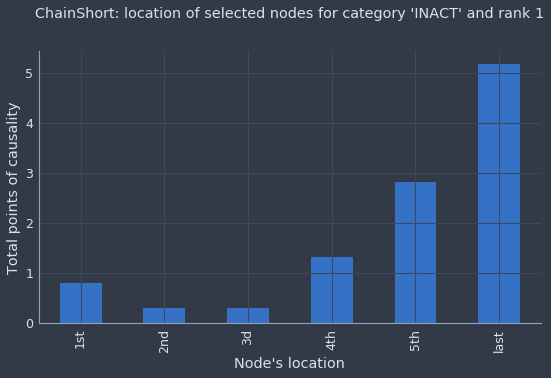

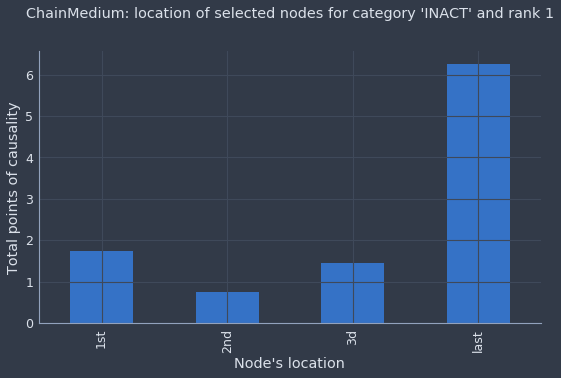

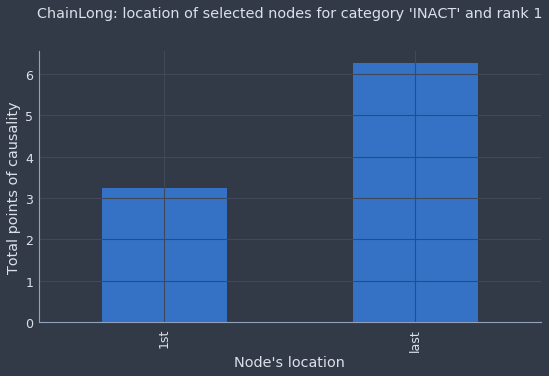

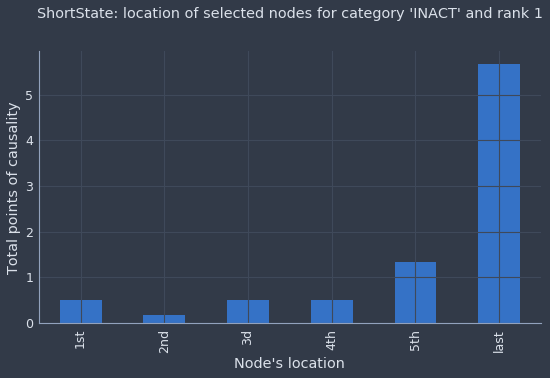

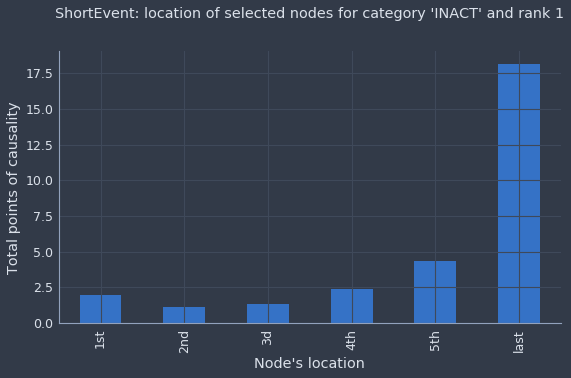

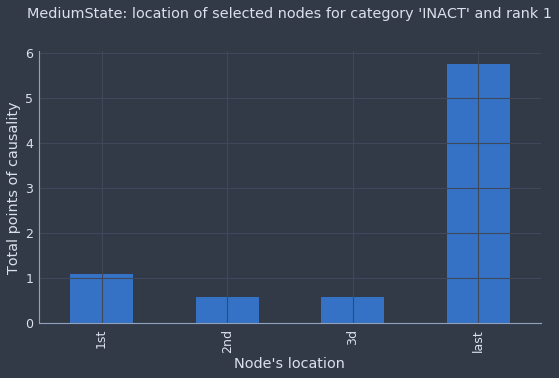

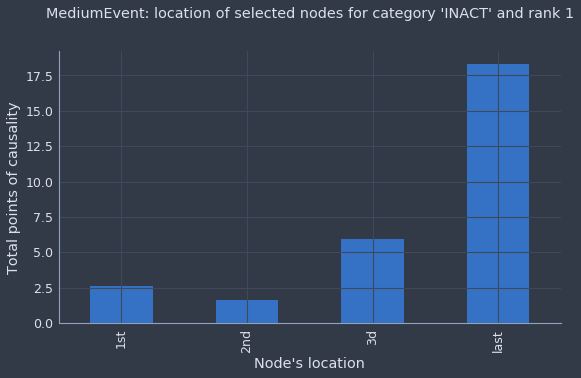

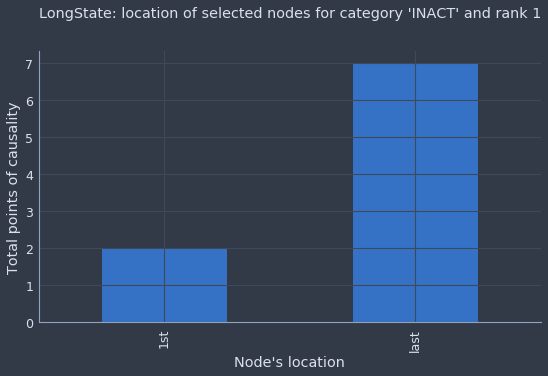

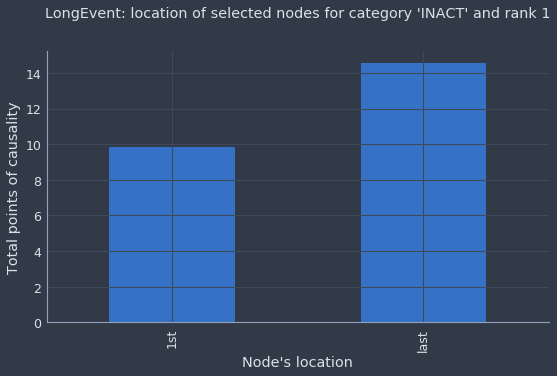

In [10]:
# Here 'INACT' corresponds to the category of inactivated nodes of the first branch and the ones of the second branch.
# So 'INACT' = 'INACT_1st' + 'INACT_2nd'. If for example we want to see which detectors, in the category 'INACT' were clicked
# the most for each of the type of graph (ChainShort, ChainMedium, etc) we can type the function below.
# It outputs the location of the detector, '1st' being the farthest inactivated node and 'last' the closest inactivated node
# compare to the root.

# Type for example ChainShort.ranking(output='broad_cat') to see the availible categories (here only 'INACT')'.
# Type for example ChainShort.ranking(output='INACT',normalized=False) to see the corresponding pandas series of the 
# first graph below.

graph_cat_details(ChainShort,'INACT','ChainShort',rank=1,normalized=False) # change 'INACT' to 'INACT_1st' for example.
graph_cat_details(ChainMedium,'INACT','ChainMedium',rank=1,normalized=False)
graph_cat_details(ChainLong,'INACT','ChainLong',rank=1,normalized=False)
graph_cat_details(ShortState,'INACT','ShortState',rank=1,normalized=False)
graph_cat_details(ShortEvent,'INACT','ShortEvent',rank=1,normalized=False)
graph_cat_details(MediumState,'INACT','MediumState',rank=1,normalized=False)
graph_cat_details(MediumEvent,'INACT','MediumEvent',rank=1,normalized=False)
graph_cat_details(LongState,'INACT','LongState',rank=1,normalized=False)
graph_cat_details(LongEvent,'INACT','LongEvent',rank=1,normalized=False)

## Comparison Right *vs* Left

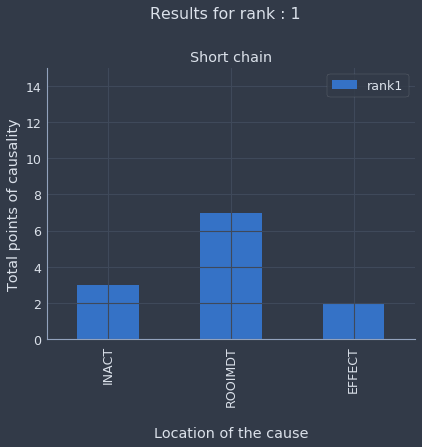

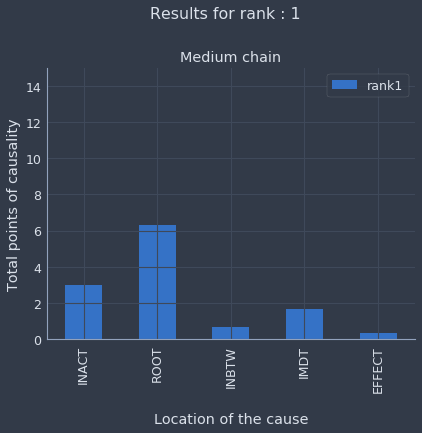

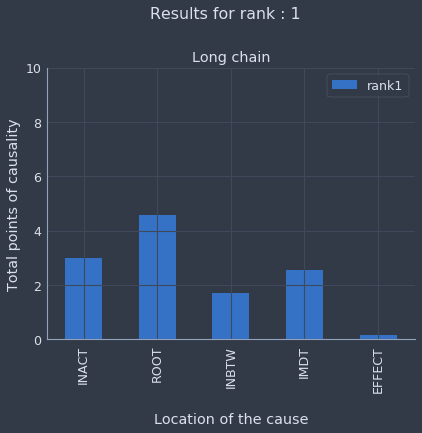

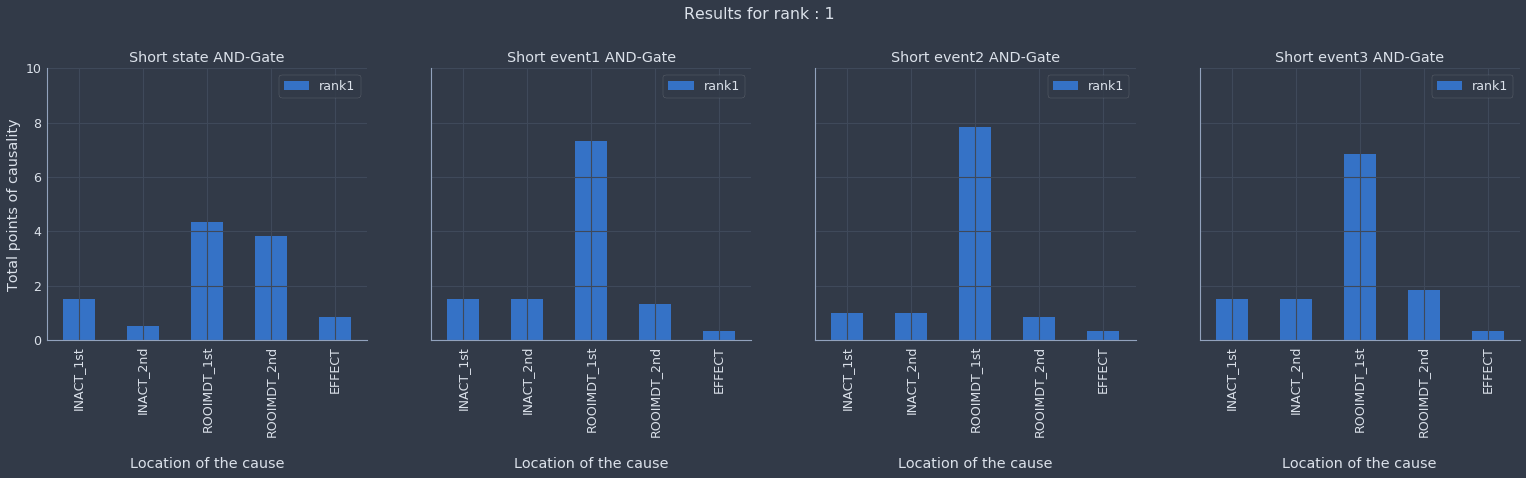

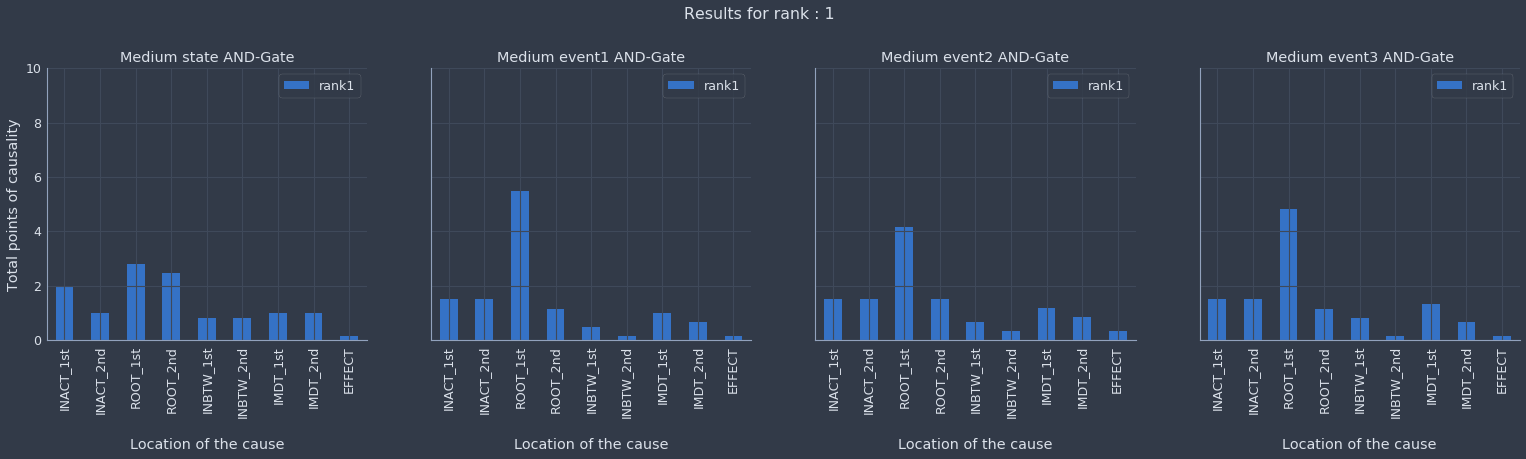

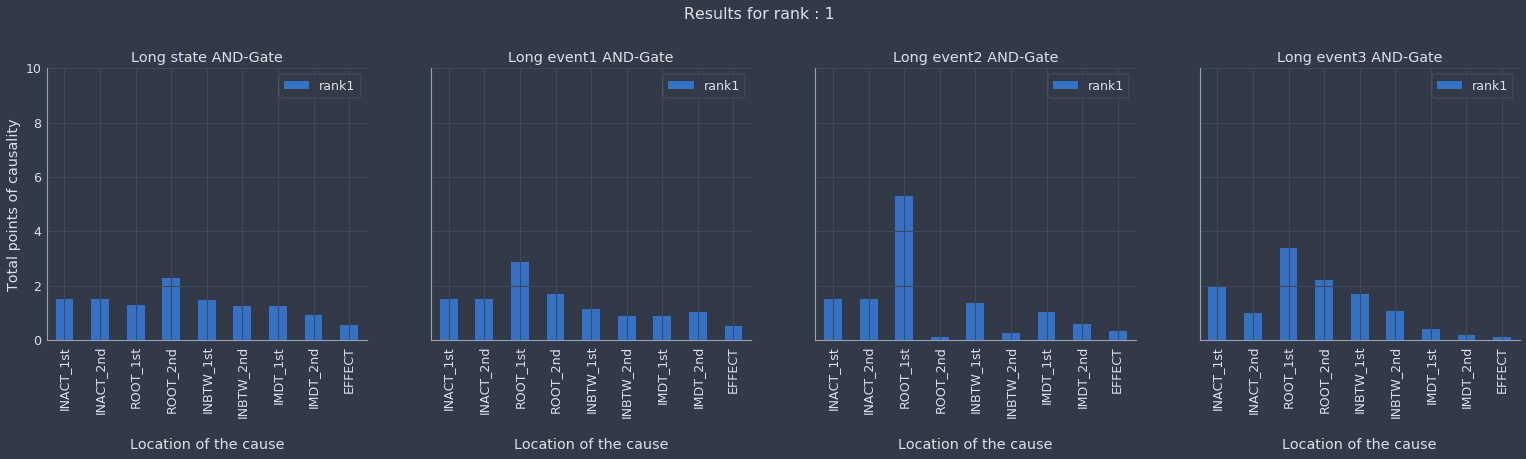

In [11]:
# Same as the general comparison BUT only for the condition 'right' (the effect at the top right)

ChainShort = Chain("short").add_filter(sampling='right')
ChainMedium = Chain("medium").add_filter(sampling='right')
ChainLong = Chain("long").add_filter(sampling='right')
ShortState = AndGate("short").add_filter(sampling='right',delay=False)
MediumState = AndGate("medium").add_filter(sampling='right',delay=False)
LongState = AndGate("long").add_filter(sampling='right',delay=False)
ShortEvent1 = AndGate("short").add_filter(sampling='right',delay="short")
ShortEvent2 = AndGate("short").add_filter(sampling='right',delay="medium")
ShortEvent3 = AndGate("short").add_filter(sampling='right',delay="long")
MediumEvent1 = AndGate("medium").add_filter(sampling='right',delay="short")
MediumEvent2  = AndGate("medium").add_filter(sampling='right',delay="medium")
MediumEvent3 = AndGate("medium").add_filter(sampling='right',delay="long")
LongEvent1 = AndGate("long").add_filter(sampling='right',delay="short")
LongEvent2  = AndGate("long").add_filter(sampling='right',delay="medium")
LongEvent3 = AndGate("long").add_filter(sampling='right',delay="long")

graph(ChainShort,title1,rank=1,normalized=False,limit=15)
graph(ChainMedium,title2,rank=1,normalized=False,limit=15)
graph(ChainLong,title3,rank=1,normalized=False,limit=10)
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],title4,rank=1,normalized=False,limit=10)
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],title5,rank=1,normalized=False,limit=10)
graph([LongState,LongEvent1,LongEvent2,LongEvent3],title6,rank=1,normalized=False,limit=10)

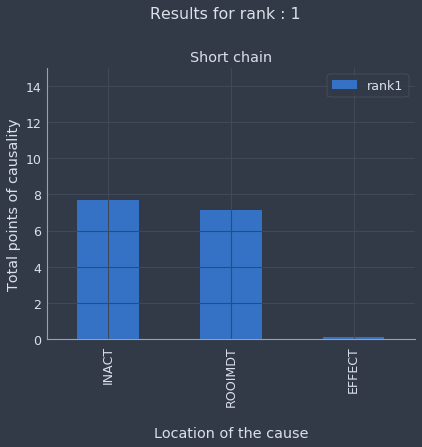

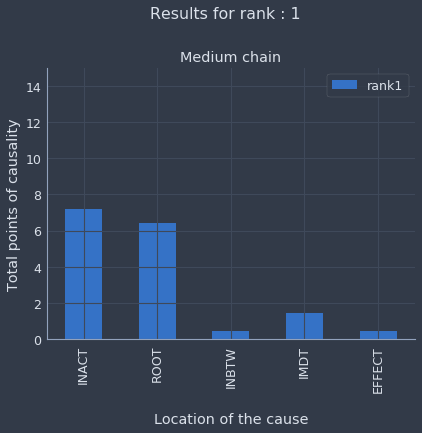

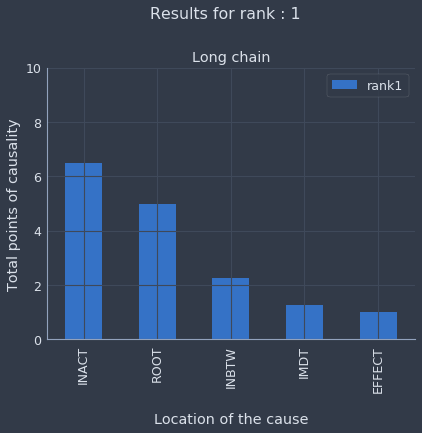

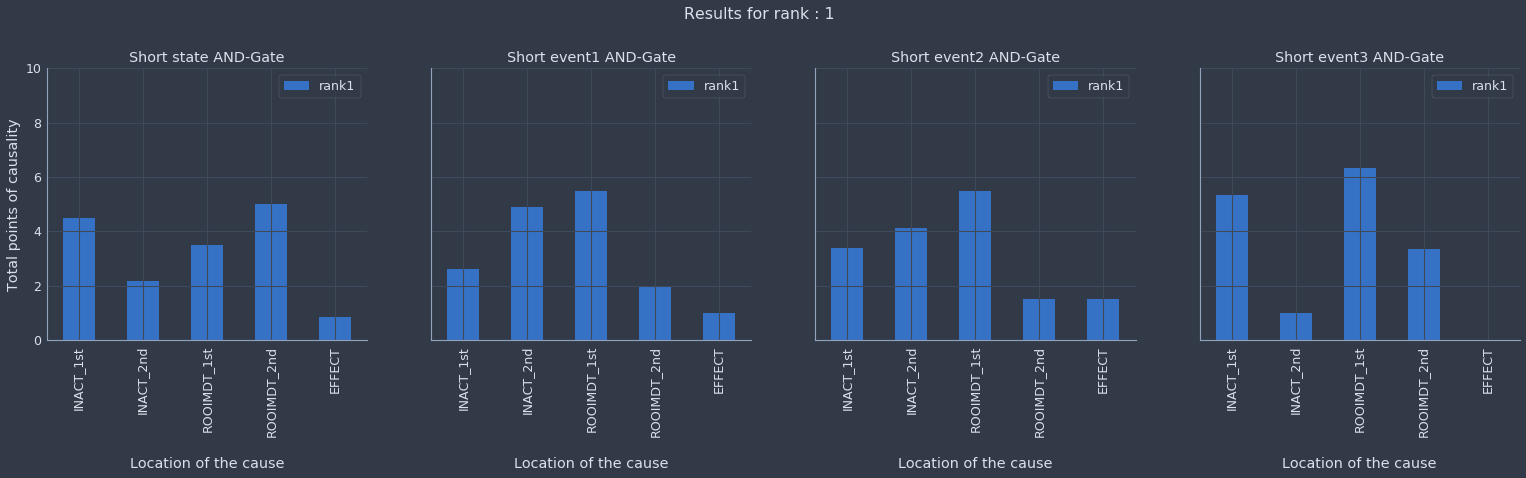

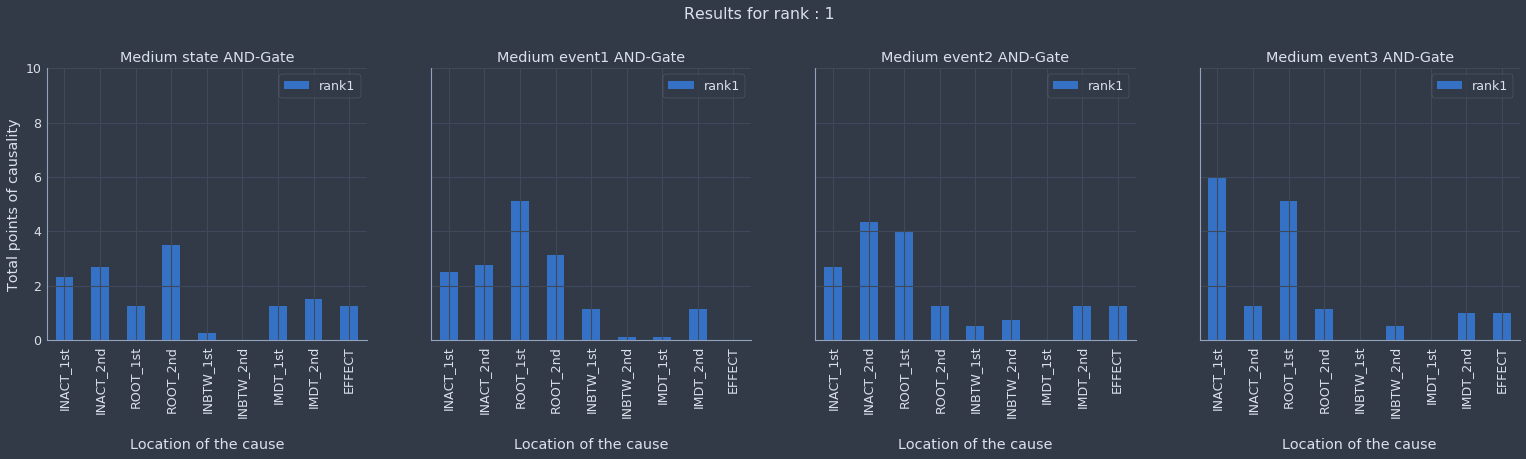

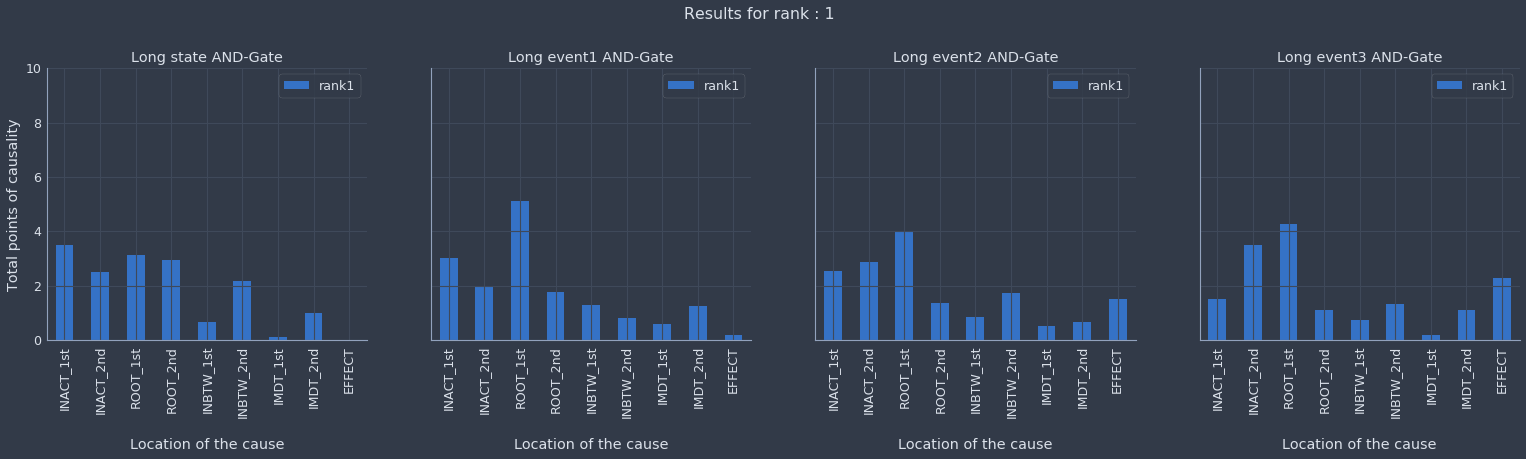

In [12]:
# Same as the general comparison BUT only for the condition 'left' (the effect at the top left)

ChainShort = Chain("short").add_filter(sampling='left')
ChainMedium = Chain("medium").add_filter(sampling='left')
ChainLong = Chain("long").add_filter(sampling='left')
ShortState = AndGate("short").add_filter(sampling='left',delay=False)
MediumState = AndGate("medium").add_filter(sampling='left',delay=False)
LongState = AndGate("long").add_filter(sampling='left',delay=False)
ShortEvent1 = AndGate("short").add_filter(sampling='left',delay="short")
ShortEvent2 = AndGate("short").add_filter(sampling='left',delay="medium")
ShortEvent3 = AndGate("short").add_filter(sampling='left',delay="long")
MediumEvent1 = AndGate("medium").add_filter(sampling='left',delay="short")
MediumEvent2  = AndGate("medium").add_filter(sampling='left',delay="medium")
MediumEvent3 = AndGate("medium").add_filter(sampling='left',delay="long")
LongEvent1 = AndGate("long").add_filter(sampling='left',delay="short")
LongEvent2  = AndGate("long").add_filter(sampling='left',delay="medium")
LongEvent3 = AndGate("long").add_filter(sampling='left',delay="long")

graph(ChainShort,title1,rank=1,normalized=False,limit=15)
graph(ChainMedium,title2,rank=1,normalized=False,limit=15)
graph(ChainLong,title3,rank=1,normalized=False,limit=10)
graph([ShortState,ShortEvent1,ShortEvent2,ShortEvent3],title4,rank=1,normalized=False,limit=10)
graph([MediumState,MediumEvent1,MediumEvent2,MediumEvent3],title5,rank=1,normalized=False,limit=10)
graph([LongState,LongEvent1,LongEvent2,LongEvent3],title6,rank=1,normalized=False,limit=10)

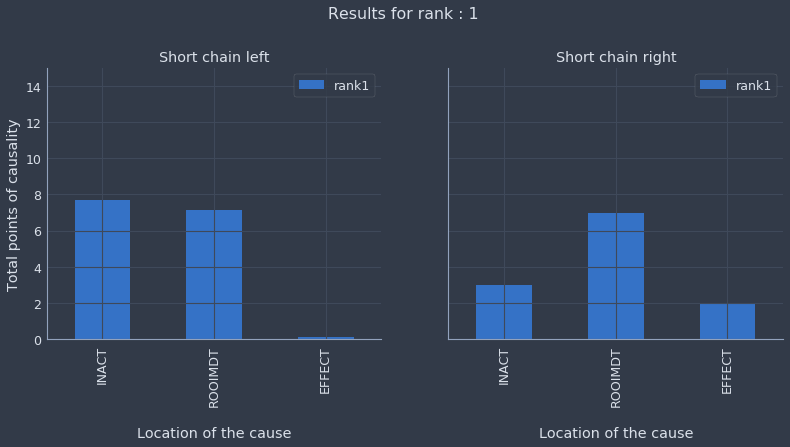

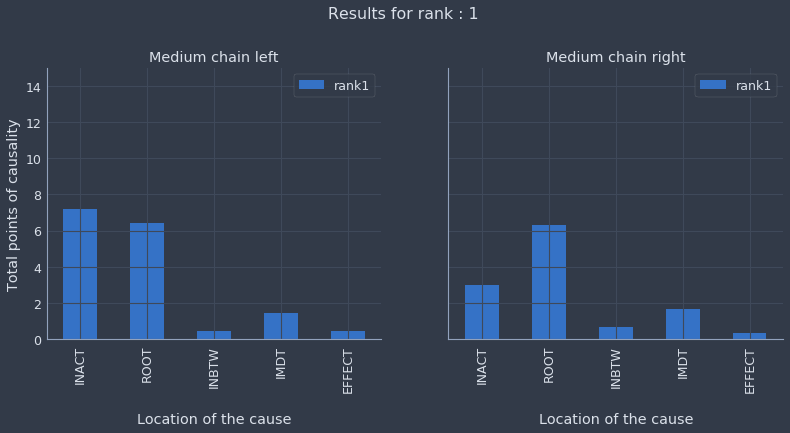

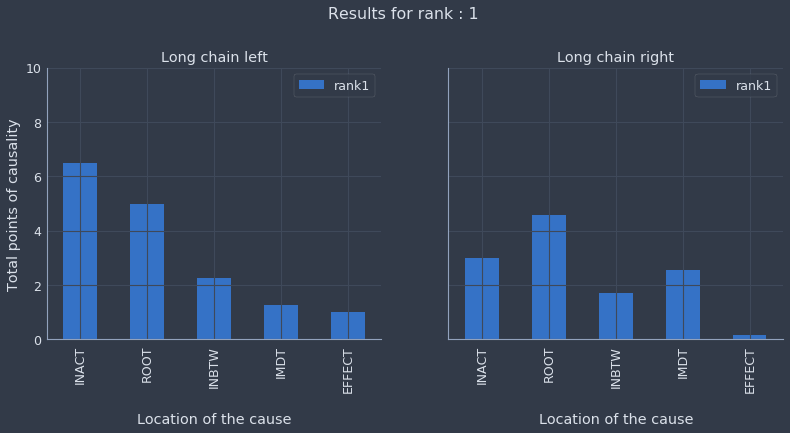

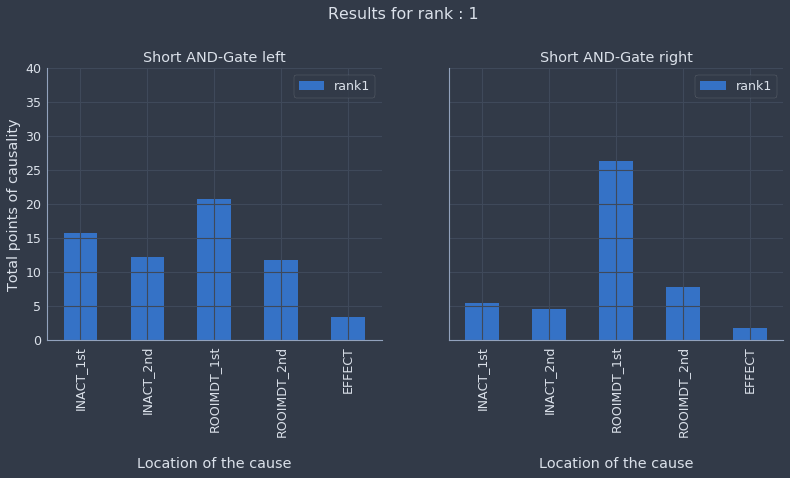

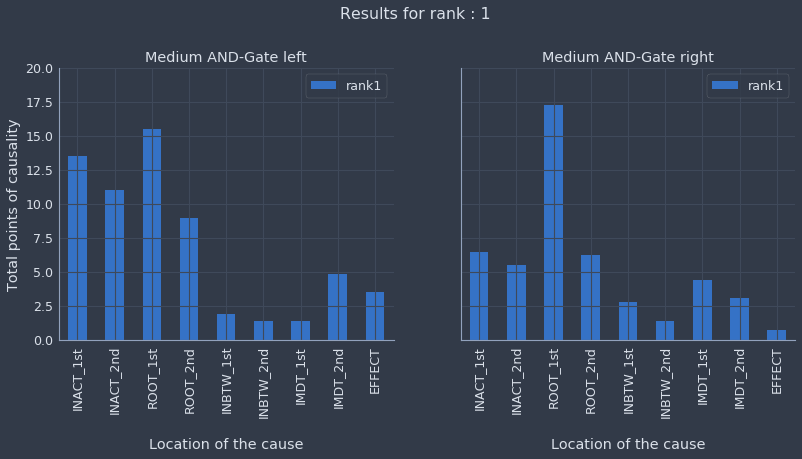

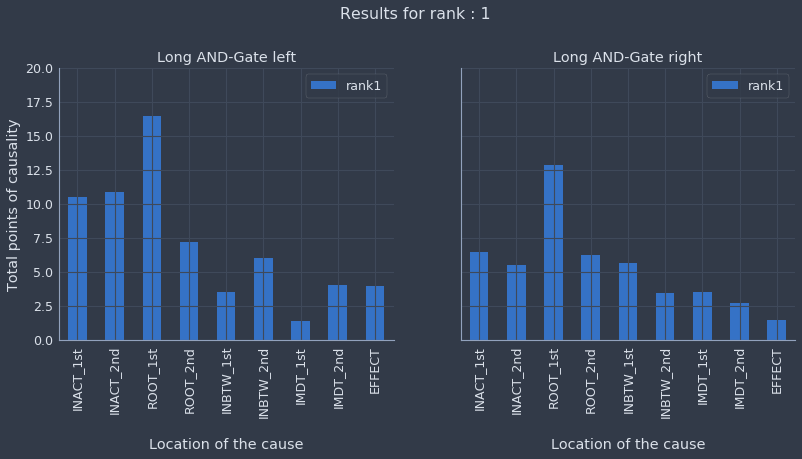

In [13]:
# Broad comparison between right vs left sampling, regardless of the conditions associated to each branch (whether it is 
# state or event --short, medium, long)

ChainShort_R = Chain("short").add_filter(sampling="right")
ChainMedium_R = Chain("medium").add_filter(sampling="right")
ChainLong_R = Chain("long").add_filter(sampling="right")
ChainShort_L = Chain("short").add_filter(sampling="left")
ChainMedium_L = Chain("medium").add_filter(sampling="left")
ChainLong_L = Chain("long").add_filter(sampling="left")
BranchShort_R = AndGate("short").add_filter(sampling="right")
BranchMedium_R = AndGate("medium").add_filter(sampling="right")
BranchLong_R = AndGate("long").add_filter(sampling="right")
BranchShort_L = AndGate("short").add_filter(sampling="left")
BranchMedium_L = AndGate("medium").add_filter(sampling="left")
BranchLong_L = AndGate("long").add_filter(sampling="left")

title1 = ["Short chain left","Short chain right"]
title2 = ["Medium chain left","Medium chain right"]
title3 = ["Long chain left","Long chain right"]
title4 = ["Short AND-Gate left","Short AND-Gate right"]
title5 = ["Medium AND-Gate left","Medium AND-Gate right"]
title6 = ["Long AND-Gate left","Long AND-Gate right"]

graph([ChainShort_L,ChainShort_R],title1,rank=1,normalized=False,limit=15)
graph([ChainMedium_L,ChainMedium_R],title2,rank=1,normalized=False,limit=15)
graph([ChainLong_L,ChainLong_R],title3,rank=1,normalized=False,limit=10)
graph([BranchShort_L,BranchShort_R],title4,rank=1,normalized=False,limit=40)
graph([BranchMedium_L,BranchMedium_R],title5,rank=1,normalized=False,limit=20)
graph([BranchLong_L,BranchLong_R],title6,rank=1,normalized=False,limit=20)

## Comparison Top *vs* Bottom

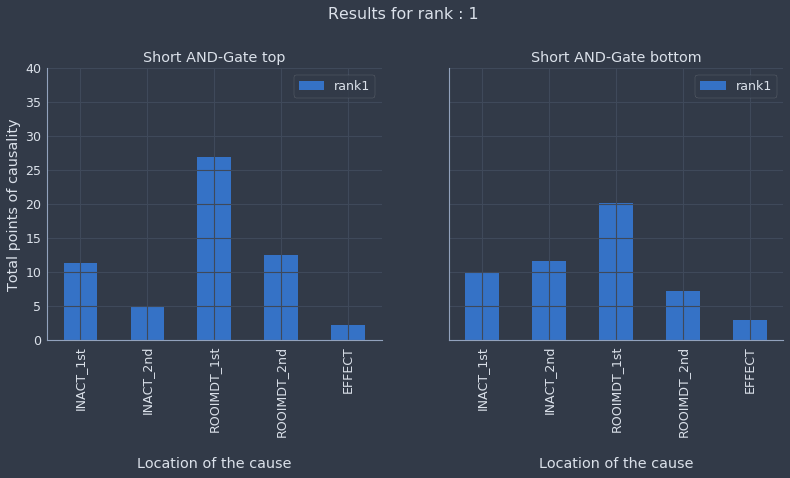

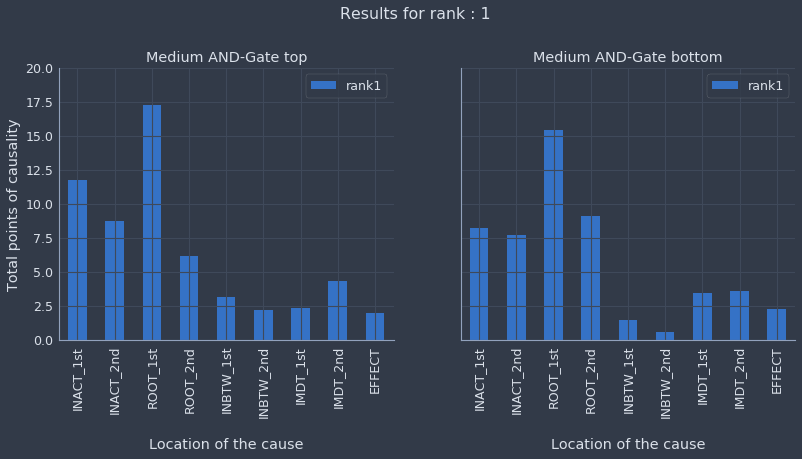

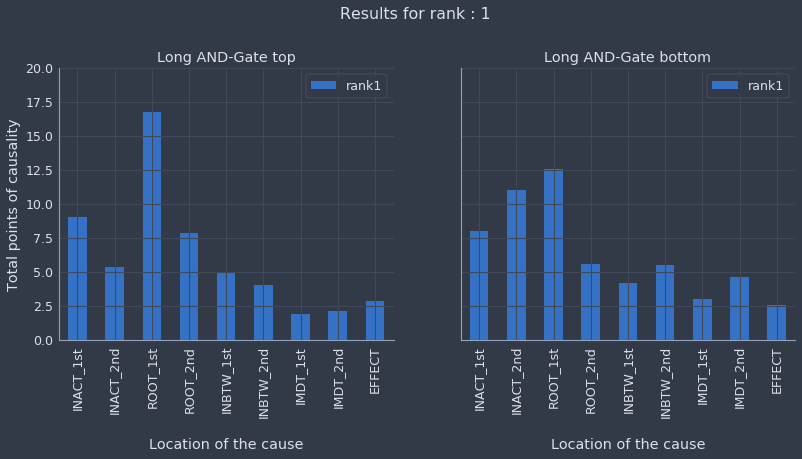

In [14]:
# Broad comparison between Top vs Bottom conditions, regardless of the conditions associated to each branch (whether it is 
# state or event --short, medium, long)

BranchShort_T = AndGate("short").add_filter(level="top")
BranchMedium_T = AndGate("medium").add_filter(level="top")
BranchLong_T = AndGate("long").add_filter(level="top")
BranchShort_B = AndGate("short").add_filter(level="bottom")
BranchMedium_B = AndGate("medium").add_filter(level="bottom")
BranchLong_B = AndGate("long").add_filter(level="bottom")

graph([BranchShort_T,BranchShort_B],["Short AND-Gate top","Short AND-Gate bottom"],rank=1,normalized=False,limit=40)
graph([BranchMedium_T,BranchMedium_B],["Medium AND-Gate top","Medium AND-Gate bottom"],rank=1,normalized=False,limit=20)
graph([BranchLong_T,BranchLong_B],["Long AND-Gate top","Long AND-Gate bottom"],rank=1,normalized=False,limit=20)